<a href="https://colab.research.google.com/github/Kits1700/WaterEnergy/blob/main/WaterRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
# resample minute data to total for each day
from pandas import read_csv
# load the new file
dataset = read_csv('/content/drive/My Drive/WaterEnergy/water.csv', header=0, index_col=0)
dataset.head(10)


,Water
Year,
1885,356
1886,386
1887,397
1888,397
1889,413
1890,458
1891,485
1892,344
1893,390


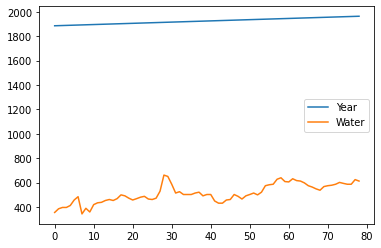

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('/content/drive/My Drive/WaterEnergy/water.csv')
series.plot()
pyplot.show()

In [ ]:
series.shape

(79, 2)

In [ ]:
series.head()

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413


In [ ]:
series.head(10)

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
5,1890,458
6,1891,485
7,1892,344
8,1893,390
9,1894,360


In [ ]:
X = series['Year'].values
y = series['Water'].values
print(X)

[1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898
 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912
 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963]


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [ ]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [ ]:
import pandas as pd
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df

,Real Values,Predicted Values
0,432,441.7
1,450,494.8
2,515,510.6
3,488,491.5


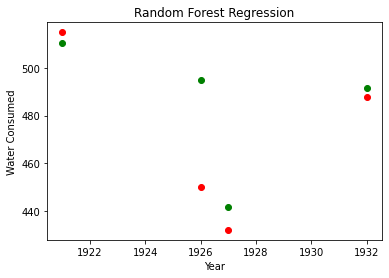

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Water Consumed')
plt.show()

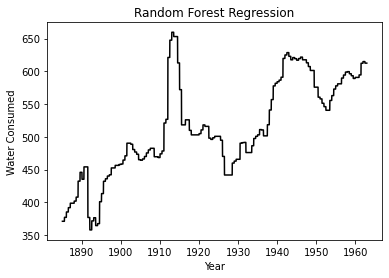

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Year')
plt.ylabel('Water Consumed')
plt.show()